<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_08_Seaborn%EC%8B%A4%EC%8A%B5_Iris%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜:
* 이름:


## 학습내용

    - distplot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비 ★★

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


In [ ]:
iris = pd.DataFrame(xs) # ★★
iris.columns = x_names
iris['label']= [y_names[i] for i in y] # i 는 y의 값
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### | 데이터 기본 탐색 ★★


In [ ]:
sepal_size = iris.iloc[:,0] * iris.iloc[:,1]   # 너비 X 길이 ★★ 순서를 안바꾸고 하는 방법 마스크를 쓰면 순서가 바뀐다.
# median 보다 작으면 0 , 크면 1 어레이 만들기
sepal_size = np.array(sepal_size>sepal_size.median(), dtype='int8')
sepal_size = [['small','big'][i] for i in sepal_size]
iris['sepal_size']=sepal_size
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
0,5.1,3.5,1.4,0.2,setosa,big
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,small
4,5.0,3.6,1.4,0.2,setosa,big


In [ ]:
sepal_size.median()

17.66

In [ ]:
mask = sepal_size >=17.66
sepal_size[mask]

0      17.85
4      18.00
5      21.06
10     19.98
14     23.20
       ...  
144    22.11
145    20.10
147    19.50
148    21.08
149    17.70
Length: 75, dtype: float64

In [ ]:
mask1 = sepal_size<17.66
sepal_size[mask1]

1      14.70
2      15.04
3      14.26
6      15.64
7      17.00
       ...  
126    17.36
133    17.64
134    15.86
142    15.66
146    15.75
Length: 75, dtype: float64

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
 5   sepal_size         150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


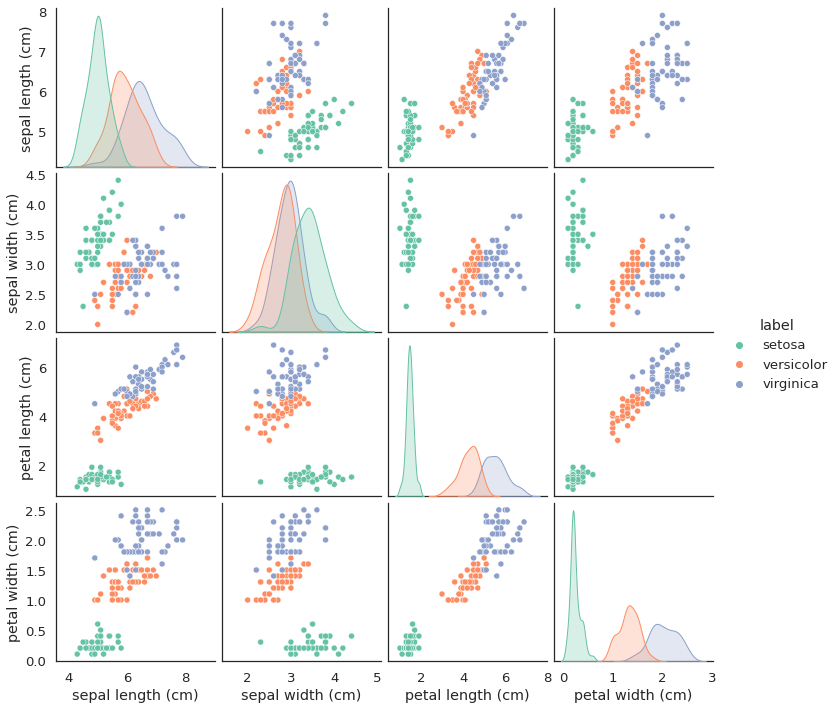

In [ ]:
sns.pairplot(iris, hue = 'label') # petal 너비와 길이가 잘 구분되어있고 setosa는 구분이 잘되어있는 데이터다.

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

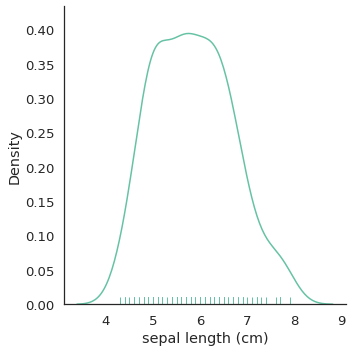

In [ ]:
sns.displot(data = iris, x = x_names[0],
            kind='kde',
            rug='True',
            
            ) 

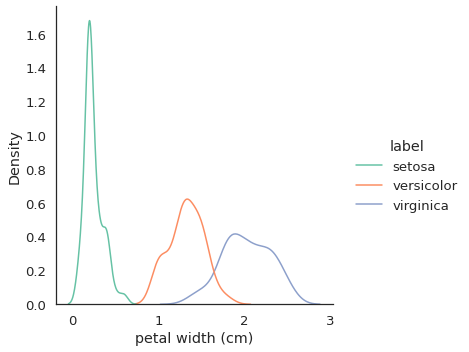

In [ ]:
sns.displot(data=iris, x=x_names[-1],
            hue='label',
            kind='kde',
            )

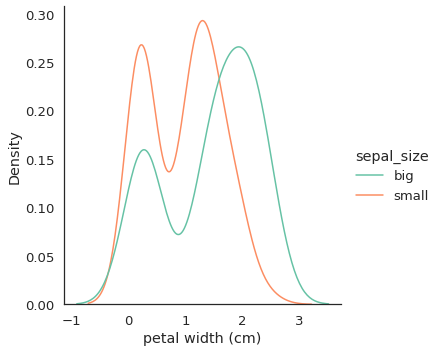

In [ ]:
sns.displot(data=iris, x=x_names[-1],
            hue='sepal_size',
            kind='kde',
            ) # 구분이 잘된 변수라면 두개로 뚜렷하게 분리된 그래프가 나온다.

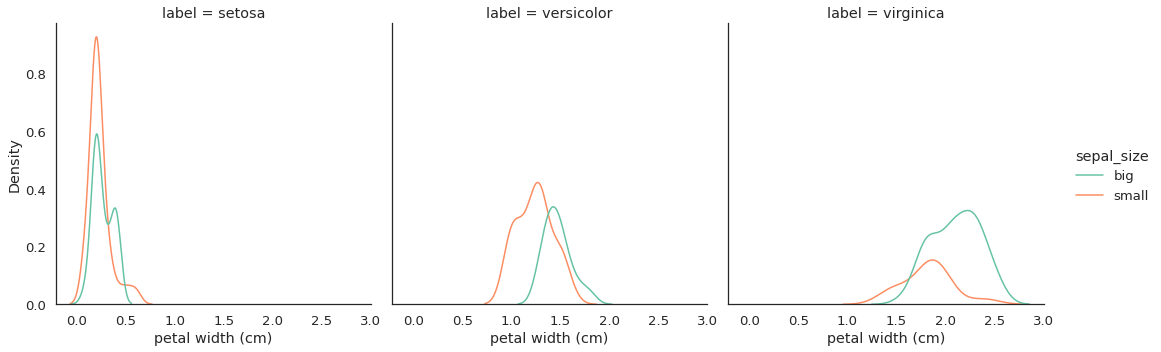

In [ ]:
sns.displot(data=iris, x=x_names[-1],
            hue = 'sepal_size',
            kind = 'kde',
            col ='label' # 열별로 종류 보기
            )

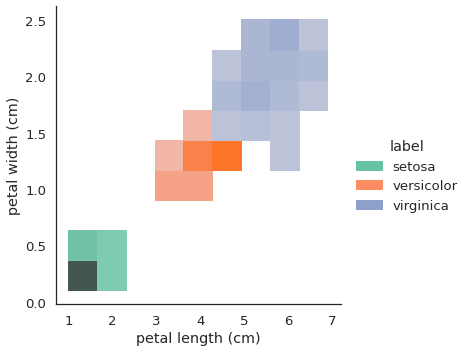

In [ ]:
sns.displot(data=iris, x=x_names[2], y=x_names[3], # 밀도 플롯이므로 진한 부분의 구간이 값의 분포가 많은 부분이다.(히스토그램 타입이다.)
            hue='label')

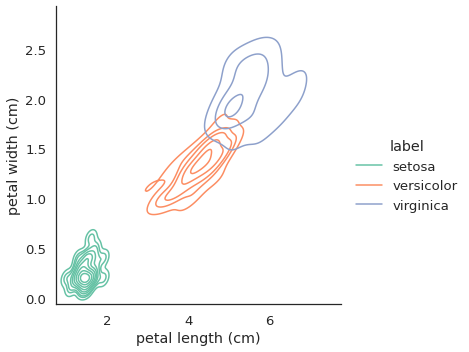

In [ ]:
sns.displot(data=iris, x=x_names[2], y=x_names[3],
            kind='kde',
            hue='label')

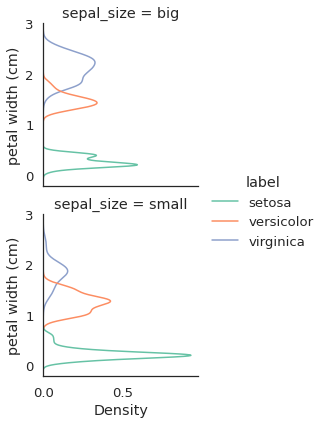

In [40]:
sns.displot(data=iris, y=x_names[3],
            kind='kde',
            hue='label',
            row = 'sepal_size',
            height=3,)

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

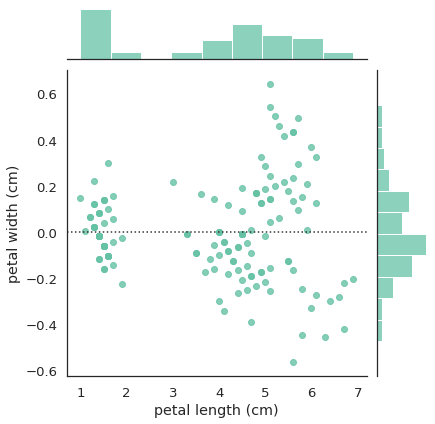

In [49]:
sns.jointplot(data=iris, x=x_names[2], y=x_names[3],
              
              kind='resid',
              )

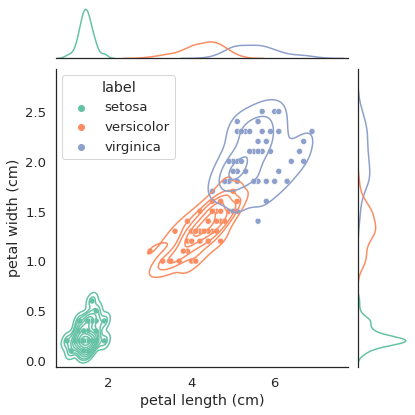

In [54]:
g = sns.jointplot(data=iris, x=x_names[2], y=x_names[3],
              hue='label',
              kind='kde',

              )
g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

In [55]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### | 데이터 기본 탐색


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [63]:
df.isnull().sum() # 결측치가 몇개 존재한다는 것을 알 수 있다.

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [64]:
df=df.dropna() # 결측치를 삭제한다.

In [65]:
df # 결측치가 사라져 총 데이터가 333개가 되었다.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [95]:
mask=df['species']=='Gentoo'
df[mask]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [66]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


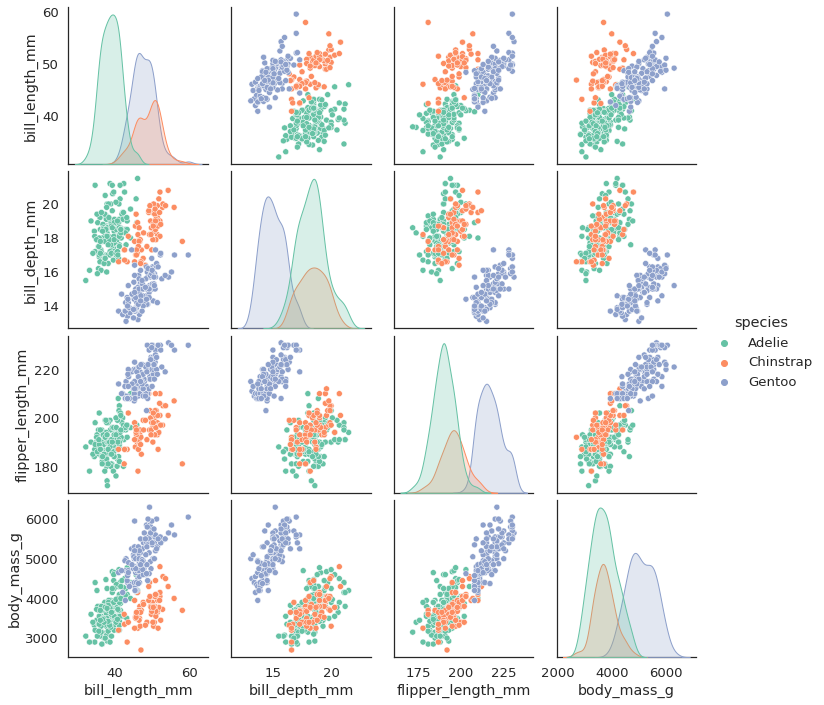

In [71]:
sns.pairplot(data=df,       
             hue='species',  # pairplot 의 라벨을 species 로 두고 뽑아본다.
             )  # 가장 구분이 잘 되어있는 2개의 그래프를 선택
                # x 축 bill_length 와 y 축 flipper_length
                # x 축 bill_length 와 y 축 body_mass 

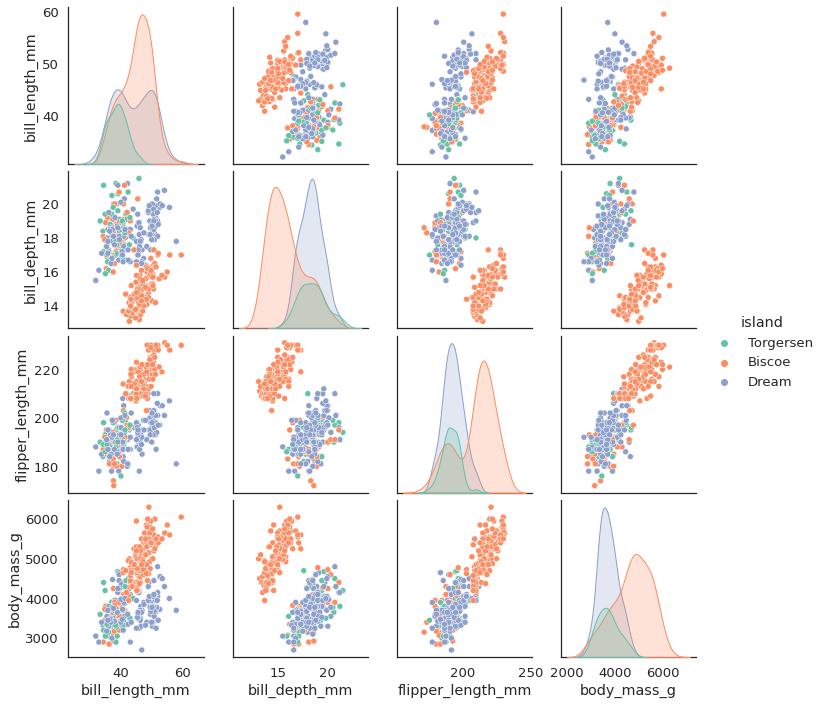

In [70]:
sns.pairplot(data=df,  
             hue='island', # pairplot 의 라벨을 island 로 두고 뽑아봄 
             )             # 섬을 중심으로 데이터를 뽑아본 결과 구분이 잘 되지 않는다. 각각의 펭귄 종류가 주로 사는 섬이 다르기 때문이다.

### (2) Distributions plot


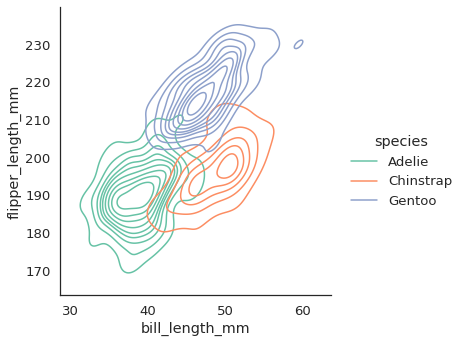

In [79]:
sns.displot(data=df,x=df['bill_length_mm'], y=df['flipper_length_mm'], # Adelie 펭귄은 부리의 길이와 날개의 길이가 다른 종의 펭귄들과 비교해 작은편이다
            hue = 'species',                                           # Chinstrap 펭귄은 날개길이가 다른 펭귄들과 비교해 비슷하거나 두드러지지 않지만 부리의 길이가 길다.
            kind = 'kde',                                              # Gentoo 펭귄은 다른 종류의 펭귄과 비교해 날개도 부리도 전체적으로 큰 편이다.
          
             )

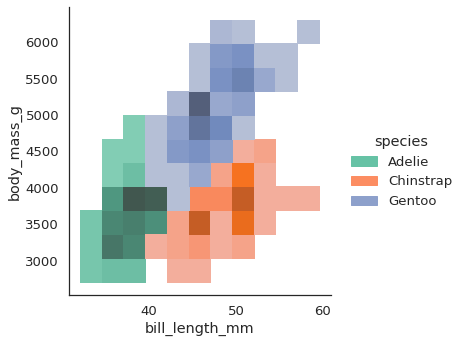

In [82]:
sns.displot(data=df,x=df['bill_length_mm'], y=df['body_mass_g'],   # 위의 부리의 길이, 날개의 길이와 비슷한 양상으로 무게도 동일한 경향을 가진다.
            hue = 'species',
            kind = 'hist',
            )

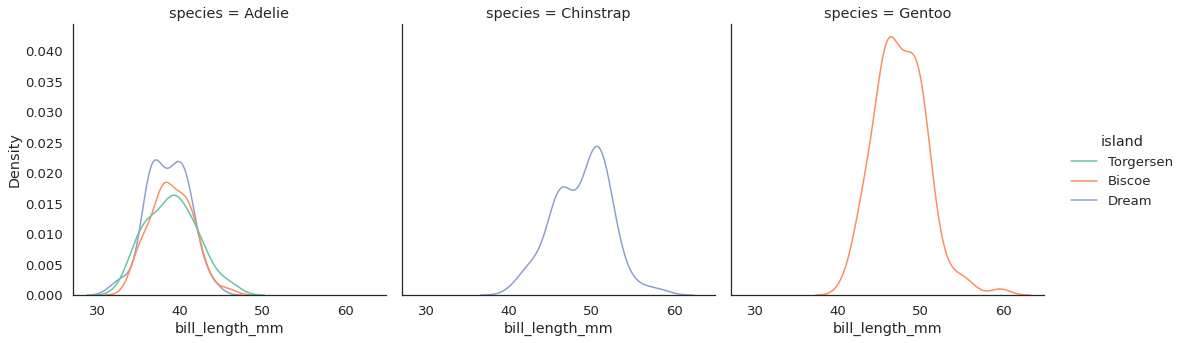

In [92]:
sns.displot(data=df,x=df['bill_length_mm'],   # Adelie 펭귄은 3개의 섬에 골고루 살고 있지만 Chinstrap 펭귄은 Dream 섬에만 Gentoo 펭귄은 Biscoe 섬에만 살고 있다.
            hue = 'island',
            col = 'species',
            kind='kde')

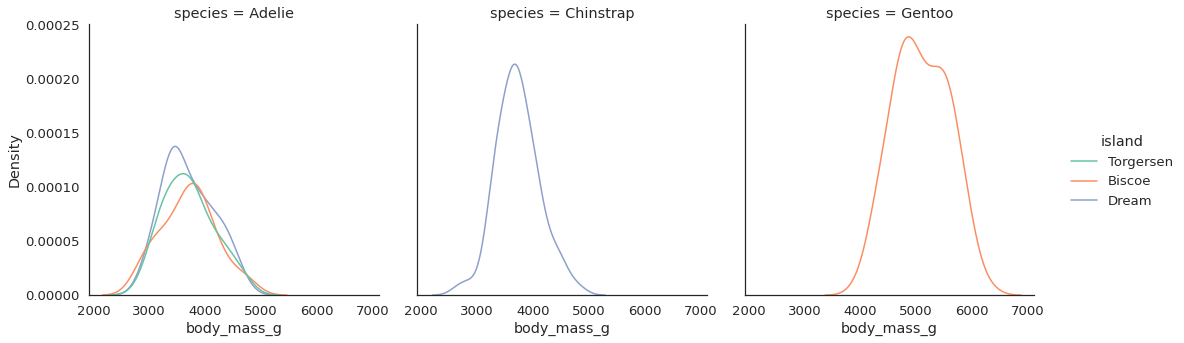

In [97]:
sns.displot(data=df,x=df['body_mass_g'],
            hue = 'island',
            col = 'species',
            kind='kde')

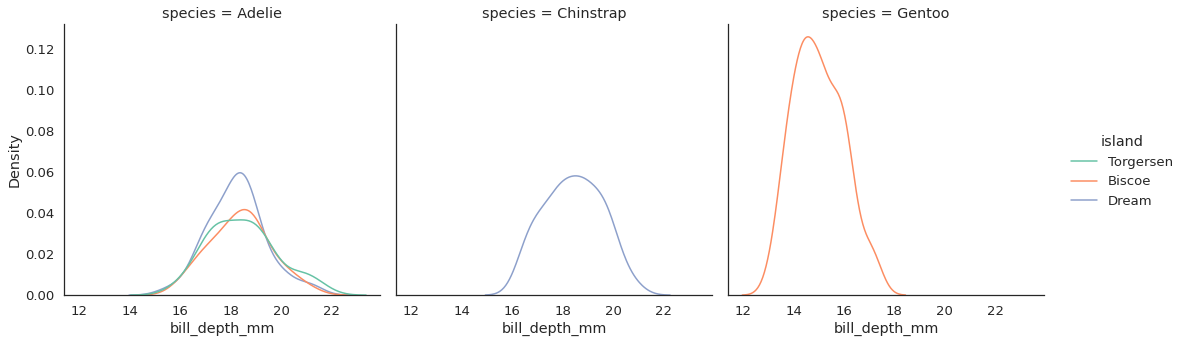

In [98]:
sns.displot(data=df,x=df['bill_depth_mm'], # Gentoo 펭귄의 부리 깊이는 다른 종에 비해서 작은 편이다.
            hue = 'island',
            col = 'species',
            kind='kde')

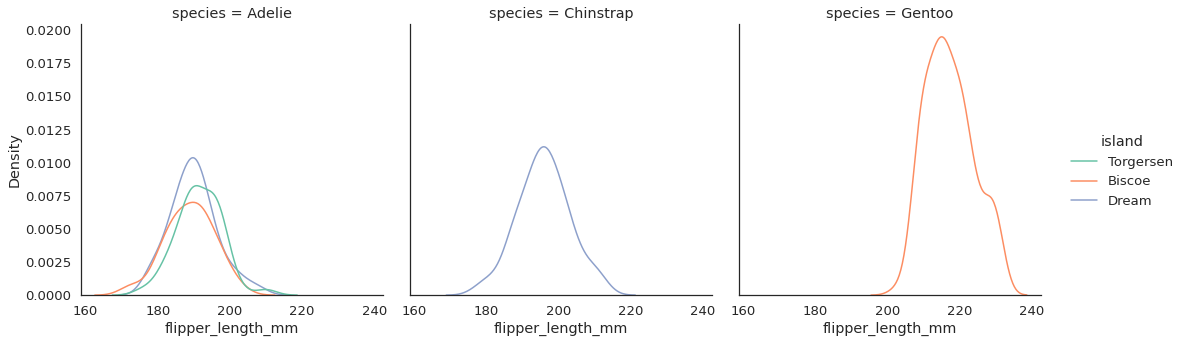

In [99]:
sns.displot(data=df,x=df['flipper_length_mm'], # Gentoo 펭귄의 날개 길이가 다른 두 종에 비해 긴편이다.
            hue = 'island',
            col = 'species',
            kind='kde')

### (3) Joint plot


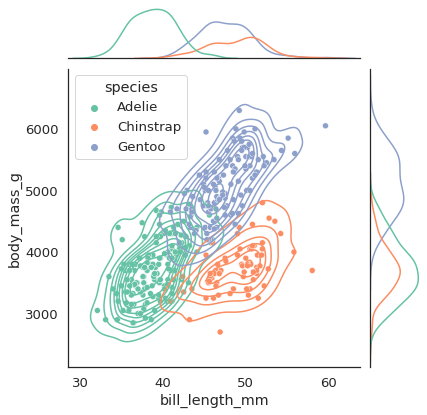

In [96]:
g = sns.jointplot(data=df, x=df['bill_length_mm'], y=df['body_mass_g'],
              hue='species',
              kind='kde')
g.plot_joint(sns.scatterplot)